In [12]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
string.punctuation
from datetime import timedelta
import numpy as np
import nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project\\"


In [14]:
df = pd.read_csv(dir_+"updated_drug_reviews_cleaned.csv")
# df = pd.read_csv(dir_+"drug_reviews_cleaned.csv")


In [15]:
df[['Text', 'Drug', 'cleaned_review']] = df[['Text', 'Drug', 'cleaned_review']].apply(lambda x: x.str.strip())
df = df.rename(columns={'cleaned_review': 'Comment'})

In [19]:
# remove missing ratings
df.dropna(subset=['Rating'], inplace = True)
df


,Text,Rating,Drug,Comment
0,I started ozempic 9 months ago. At the time I ...,10.0,Ozempic,I started ozempic 9 months ago. At the time I ...
1,I did one injection and have been ill since.\n...,1.0,Ozempic,I did one injection and have been ill since. H...
2,I’ve been Ozempic for 4 weeks. I am so glad t...,10.0,Ozempic,Ive been Ozempic for 4 weeks. I am so glad tha...
3,"Started on Ozempic Sept 2020, starting weight ...",10.0,Ozempic,"Started on Ozempic Sept 2020, starting weight ..."
4,I took one Ozempic injection at .25 and ended ...,1.0,Ozempic,I took one Ozempic injection at .25 and ended ...
...,...,...,...,...
744,I am in my50’s \nI Lost 5 pounds \nI take 10 m...,7.0,Jardiance,I am in my50s I Lost 5 pounds I take 10 mg Jar...
745,"I have been on Jardiance for 2 years, as my do...",1.0,Jardiance,"I have been on Jardiance for 2 years, as my do..."
746,I get it everyone is different but I will shar...,1.0,Jardiance,I get it everyone is different but I will shar...
747,Disgusting experience. Urinating one and a hal...,3.0,Jardiance,Disgusting experience. Urinating one and a hal...


In [20]:
## Getting average rating per drug
import statistics
from statistics import mean
for x in df['Drug'].unique():
    print("Average rating for the drug ", x, 'is:',statistics.mean(df[df['Drug']==x].Rating))

Average rating for the drug  Ozempic is: 6.585585585585585
Average rating for the drug  Sitagliptin is: 4.743119266055046
Average rating for the drug  Mounjaro is: 6.966101694915254
Average rating for the drug  Rybelsus is: 6.25
Average rating for the drug  Victoza is: 8.375
Average rating for the drug  Jardiance is: 5.6521739130434785


<Axes: title={'center': 'Rating of Diabetes drugs'}, xlabel='Drug', ylabel='Rating'>

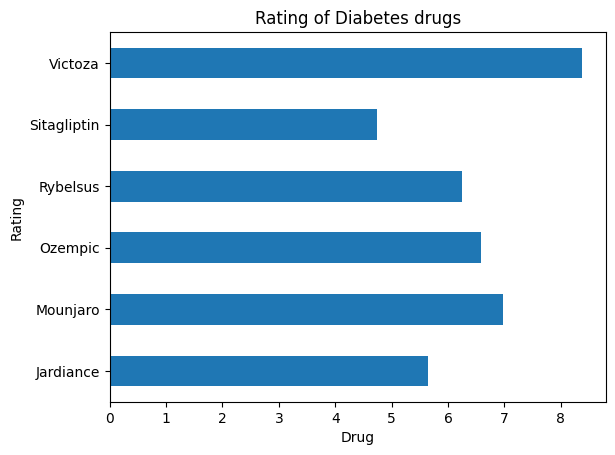

In [21]:
## Creating a chart of the average sentiment of each drug
df.groupby('Drug')['Rating'].mean().plot(kind='barh', xlabel='Drug', ylabel='Rating',
                                           title="Rating of Diabetes drugs")

In [22]:
# Make the text lowercase
df['lower_text'] =  df['Comment'].str.lower()
remv_punc = str.maketrans('','',string.punctuation + '“' +"‘"+'”')
# Remove the punctuation
df['lower_text_NoPunct'] = df['lower_text'].str.translate(remv_punc)

# Download the stopwords, but add another list with "amp", "", and white space " "
sw_list = stopwords.words('english') + ['amp',''," "]
# split on whitespace to get separate words
df['words'] = [x.split(" ") for x in df['lower_text_NoPunct']]
# Take out stopwords
# Convert the text to a set, subtract the set of stopwords, turn into list
df['words'] = [list(set(x) - set(sw_list)) for x in df['words']]
# Creating an instance of the CountVectorizer with a stop word list.
vct = CountVectorizer(stop_words=sw_list)
# Gives me an output of word counts 
X = vct.fit_transform(list(df['lower_text_NoPunct']))
# make X a dataframe
word_counts = pd.DataFrame(X.sum(axis=0))
# Assign to columns a list of the feature names from .get_feature_names_out()
word_counts.columns = vct.get_feature_names_out()
# Transpose, so that word labels are rows instead of columns
word_counts = word_counts.T
words =  word_counts[0].index

In [28]:
data = pd.DataFrame(X.toarray(), \
                 columns=word_counts.index)
#data['Rating'] = df[['Rating']]

In [48]:
data['Rating'] = df['Rating'].to_list()